# Overview of MLOps

## What is MLOps?

Similar to DevOps, which is the implementation and automation of continuous integration (CI) and continuous delivery (CD) for softwares, MLOPs is the implementation and automation of CI, CD and an additional process called continuous training (CT) for machine learning models.

## MLOps levels of maturity

Google introduced 3 levels of [MLOps](https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning):
- Level 0: Manual process
- Level 1: ML pipeline automation (CT pipeline automation)
- Level 2: CI/CD pipeline automation

Microsoft introduced 5 levels of [MLOps](https://learn.microsoft.com/en-us/azure/architecture/example-scenario/mlops/mlops-technical-paper):
- Level 0: No Ops
- Level 1: DevOps but no MLOps
- Level 2: Automated training
- Level 3: Automated model deployment
- Level 4: Automated operations (full MLOps)

You can see Google prioritize getting CT part first in their level 1, while Microsoft prioritize CI/CD for codes. But whatever the models, they all progress from no automation to fully automated process.

Personally, I don't consider automation as the only factor for MLOps maturity. There are other factors such as ML/Software development methodology (efficient team, how they work together to control code quality and reusability while still have speed), supporting libraries and frameworks, etc.

## Building an efficient ML team

ML is experimental in nature, however, the end product is still a software system. Hence, to really apply ML efficiently into a product, a team of different skillsets is needed. The 2 main roles (beside other stakeholders such as project manager, product owner, etc.) normally involved in an ML team are the AI scientist (or data scientist, or researcher etc.) and the software engineer (including data engineer). The scientists and engineers can usually has a mismatch of approach and skills in their work. Beside new skill acquisitions by all team members, to ease the differences, many AI/ML teams also have embedded research engineer, that bridge the gaps between research and application.

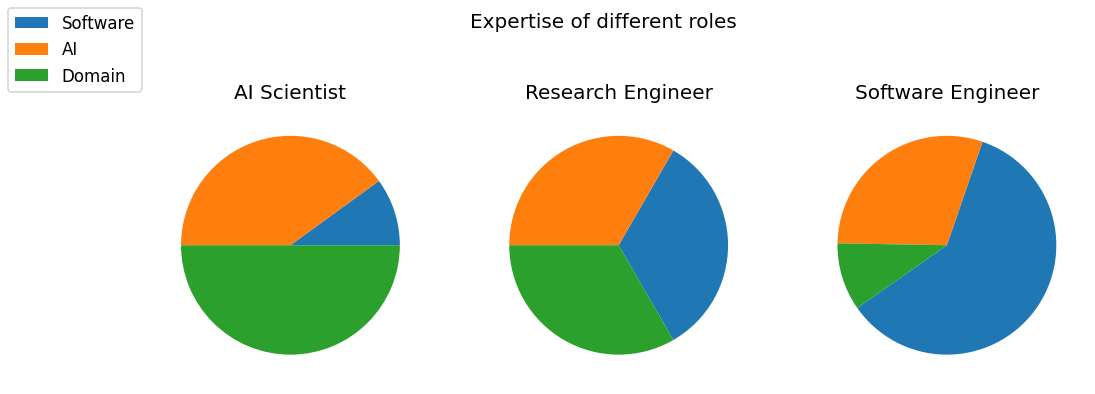

In [2]:
%matplotlib inline 
from mlf.figures import *
fig1_team_skills()

## ML workflow
1. Data extraction
2. Data analysis
3. Data preparation (and feature engineering)
4. Model training
5. Model evaluation
6. Model serving
7. Model monitoring

The level of automation of above steps defines the maturity of the ML process. 

One of the core differences between a traditional software system and a ML system is that a software system normally only need to version control codes and configurations, while a ML system will also need to version control data (and features) and models beside codes and configurations.

Furthermore, it is not necessary (and might not be that beneficial) to go all the way to the highest level of MLOps maturity. The following figure shows the life cycle of each of the main processes in an ML workflow:

![MLOps workflow](./images/MLOps%20workflow.png)

The smaller the circle, the shorter the life cycle, and the higher the velocity. Hence, automation for low velocity processes such as data related procedures might not be necessary. Think about it this way, you prepare your dataset once, and you can use it to train many many models before you need to go back to the data stage again. But model serving and monitoring is truly a continuous process, you need to serve the model in many different platform (and re-deploy in case of outages), as well as scaling the production based on the usage, automations will speed up this process while decrease human errors by a lot.

Note: there are a lot of different definitions out there as this is still a growing field. If you are interested, you can read [this very detailed whitepaper from Google](https://services.google.com/fh/files/misc/practitioners_guide_to_mlops_whitepaper.pdf).


## MLOps visualization

It is very hard to go into technical details of all of the pieces of MLOps. I will put a very complicated diagram here, and then we can go through a ML development workflow, each step with example of a totally manual process and of a improved process (improved instead of fully automated because full automation might be too costly in many of the steps). Note that the following processes are just an example out of many ways you can adopt to improve your ML development. Note that you may think MLOps might introduce a lot of new systems as well as ways of working, but this is not for a single ML project, it's for the entire organization ML development.

<img src="./images/End_to_end_MLOps.jpg" width="1080"/>

### Data extraction and analysis

This part is highly exploratory in nature, and hence an automation pipeline is not really necessary, as it may add overhead for the scientist instead of research velocity. One of the easy improvements that can be made to this process is to discuss with an engineer and build a central library (with proper CI/CD) that is shared between the scientists and the engineers for data analysis utilities. This shared utility library can be very helpful, as it increases code reusability and quality, in turn, it increases the overall speed for ML development and future data work.

### Data preparation and feature engineering

#### Fully manual process
Using Jupyter Notebook or Python script:
- Code your own dataset class (maybe using `tf.data.Dataset` or `torch.utils.data.Dataloader` as base)
- Code your own feature engineering pipeline (e.g.: preprocess all of the image through ImageNet and get the output features before the last layer as the training input)
- Present your codes during a review meeting and discuss, or just move on to the next step model development and maybe present the final result later

#### Improved process
Some of the systems that you should consider having: a shared library (e.g. `mlops.data`) and a data store/repository (maybe a database and a S3 bucket to store and version control your data).
- Develop a proof of concept for your dataset class and feature engineering pipeline
- Commit your code as a pull request, work with a research/software engineer in the same project to review your code (can request a review from other team members too), and commit it into a shared library (maybe your team's `mlops.data` repository)
- The engineer has already setup CI/CD for this shared library, hence once your code is reviewed and committed, everyone can reuse it immediately. You can be sure that the dataset and its feature engineering pipeline is vested and ready to use. This feature engineering pipeline can also be reused by software engineers that's deploying future models into production too, saving them time in developing the same pipeline again.

### Model development, training and validation

#### Fully manual process
- Use your dataset you prepared yourself in the previous step, build a model that conform to the dataset input and ground truth.
- Code your training script, or maybe use some of your previous training script, modify it so that it works for the new model
- Manual testing that your training script works
- Traing your model using the script (run locally, ssh to a server to run it, submitting it to a queue, etc.)
- Code or modify some of your existing validation script to validate your trained model
- Present the model validation's result to your team
- Choose some of the best model weights that is saved during your training checkpoints to be the official model's weights to be used for deployment

#### Improved process
Now, this model development, training and validation can be a loop that happens quickly and through many rounds of trials and errors, and this will benefit a lot from a bit of automation.
This part of ML development can really use a team of engineers to support it. 

Some of the systems that you really should consider developing or at least using some third party libraries ([mlflow](https://mlflow.org/), [weights and biases](https://wandb.ai/site) etc.):
- Shared model libraries (maybe `mlops.models`, `mlops.loss`, `mlops.optimizers` etc,): to share and reuse model building blocks, loss functions, optimizers or anything that your team developed. The engineers will implement CI/CD pipelines for these libraries, so that model codes that is commited is of good quality, also enabling early code reviews of your models. The libraries would be released as official packages so that software engineers that deploy models to production down the line can also reuse these libraries instead of having to convert your model codes into their own standard.
- Model registry: version control your model and its weights, as well as saving model metadata such as the architecture, training parameters, validation parameters, optimizers etc. so that you don't repeat yourself and can easily check what has been done. 
- Some sort of model orchestration system: this system connect your data repository, model registry, shared libraries to ensure that your model training and validation is stable and repeatable, as well as reducing human errors.

The process:
- Build your model that conform to the dataset input and ground truth, commit it to the shared library through a pull request so that other can review your codes.
- The CI/CD pipelines will trigger tests to make sure the model is properly defined (train the model using a mock dataset, make sure that data can flow from start to finish, the model can overfit mock dataset, etc.)
- Write the model configurations (metadata): training parameters, dataset to be used, validation parameters, etc.
- Submit this configuration to the orchestration system, the system will train and validate your model as well as commit the model into the model registry automatically.
- Present the model validation result to your team
- Publish the model inside the model registry to be used for model deployment

### Model deployment, monitoring and continuous training

Some can argue that this part is no longer the research team's responsibility, but it depends heavily on upstream processes, which are the team's responsibility.

#### Fully manual process
For the scientists/researchers:
- Give your model code (jupyter notebook, python script) as well as model's weights to the engineering team for deployment
- From time to time gather feedbacks, maybe also new data, analyze the model's performance in real world usage and see if there is any data shift or performance degradation
- Retrain the model if necessary

For the engineers:
- Received the model's code and weights
- Understand the code and commit it to their software system
- Manually deploy the model into their software system
- Monitor model performance

#### Improved process

- Thanks to all of the systems that the scientists and engineers developed together in upstream processes, the deployment can be fully automated, or at least can be much faster, by reusing the shared libraries.
- Since the model training code is already in the system, model continuous training can be triggered automatically or manually if the team members see fit, new data can be put through the same feature engineering pipeline and the model orchestration system can kick off a new round of training and commit the newly trained model into the model registry

With a team of experienced engineers, this last stage can be achieved easily (but can still be quite time consuming to develop) because it shared a lot of similarity with a traditional software system.

## So what's the takeaway?

All of the above is some extreme summarization of MLOps as a whole, but I understand that it is still a lot to take in, so what should we at least remember?

Fully develop a mature MLOps process takes a long time, but even if your level of maturity is 0, you can still make a vast improvement in your manual processes.

First, build an efficient ML team with a good blend of scientists and engineers, encourage cross-pollination of skillsets and ideas. While doing so, aim to increase code quality and reusability with proper shared libaries and packages (this should comes naturally when you have the scientists and the engineers work closely together), this will help the automation development down the road much easier, since the engineers does not need hours (or even days) to understand and convert the experimental codes into production ready ones, while the scientists research speed would also increase as their own codes are properly structured and version controlled, letting them focus on experimenting new ideas.

MLOps developments does not need to come at the cost of ML research.